# Homework 4 Bayesian Statistics and Machine Learning
#### Deniz Ekiz
#### 2016700051

## Q1: 


Repeat the fake/fair coin example covered in class with a prior probability of form 0.5Beta(20,3) + 0.5Beta(3,20)
Derive the marginal likelhood and create plots similar to the ones in notes/ModelingExamples.ipynb section Fair/Fake coin.
## Solution 1:



We need a prior over the probability parameter. One choice is the beta distribution
$
\begin{eqnarray}
\mathcal{B}(\pi_1; \alpha, \beta) =  \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta) } \pi_1^{\alpha-1} (1-\pi_1)^{\beta-1}
\end{eqnarray}
$

$
\begin{eqnarray}
p(\pi_1) & = & 0.5\mathcal{B}(\pi_1; \alpha + 3, \beta+20) + 0.5\mathcal{B}(\pi_1; \alpha + 20,\beta + 3) =  0.5\frac{\Gamma( \alpha + \beta + 3 + 20)}{\Gamma(\alpha+3) \Gamma(\beta+ 20) } \pi_1^{\alpha + 3-1} (1-\pi_1)^{\beta + 20-1} + 0.5\frac{\Gamma(\alpha + \beta + 3 + 20)}{\Gamma(\alpha + 20) \Gamma(\beta + 3) } \pi_1^{\alpha + 20-1} (1-\pi_1)^{\beta + 3-1}
\end{eqnarray}
$





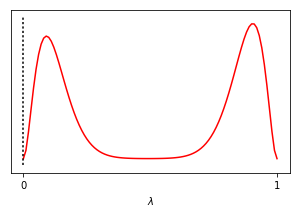

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.special import gammaln
import numpy as np
import scipy.special as sps

#savefigs = 

def log_beta_pdf(x, a, b):
    
    y = 0.5*((math.gamma(a+b+23)/(math.gamma(a+3)*math.gamma(b+20)))*(x**(a-1+3))*((1-x)**(b+20)))
    y = y + 0.5*((math.gamma(a+b+23)/((math.gamma(a+20))*math.gamma(b+3)))*x**(a-1+20)*(1-x)**(b-1 + 3))
    return y

a = 0
b = 0

xx = [1,1,1,1,1,0,1,1, 1,0,1,0,1,1,1,1,0, 1,1,1,1,1,1,1]

p = np.arange(0.0,1.01,0.01)

c = [0,0]
N = 0
plt.figure(figsize=(5,3))
dist = log_beta_pdf(p, a+c[1], b+c[0])
plt.plot(p, dist, 'r')
plt.xticks([0,1])
plt.yticks([])
#plt.xlim([-0.1,1.1])
#plt.ylim([0,6])
pi_ML =  (a+c[1])/(23+a+b+N)
yl = plt.gca().get_ylim()
plt.plot([pi_ML, pi_ML], yl , 'k:')

plt.xlabel('$\lambda$')
plt.show()

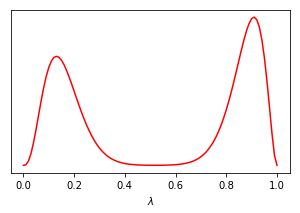

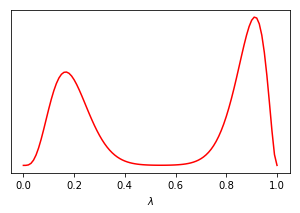

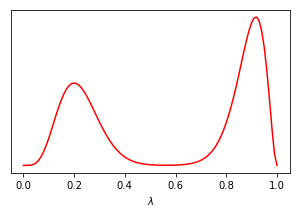

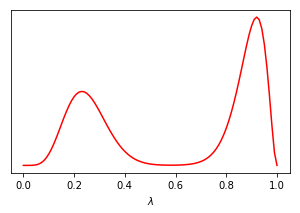

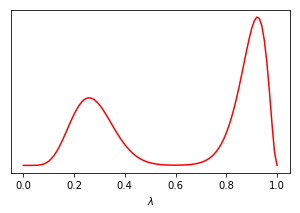

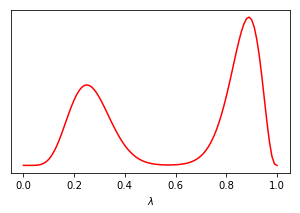

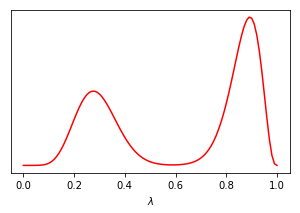

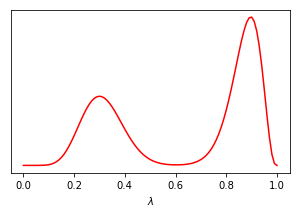

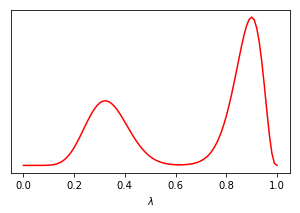

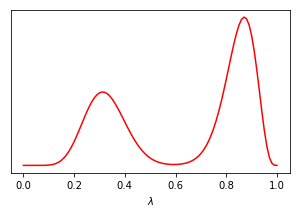

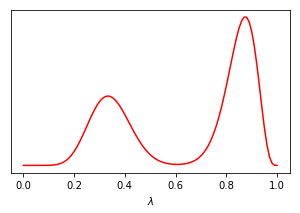

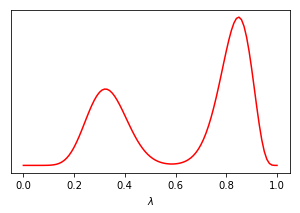

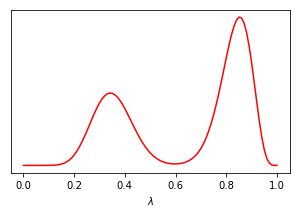

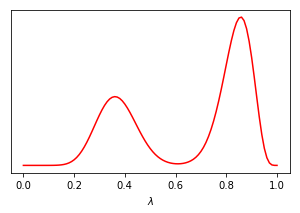

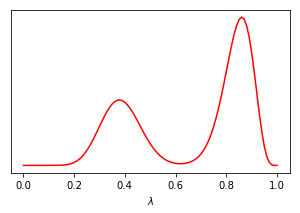

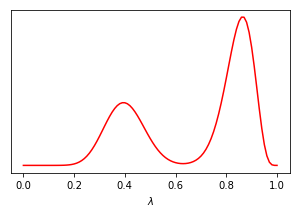

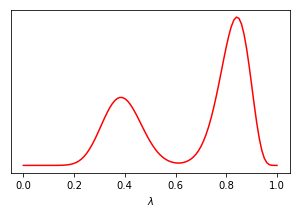

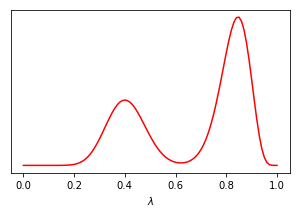

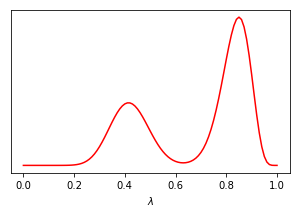

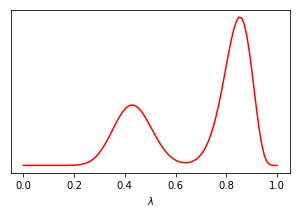

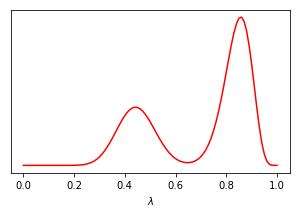

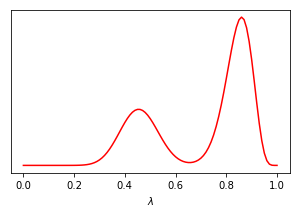

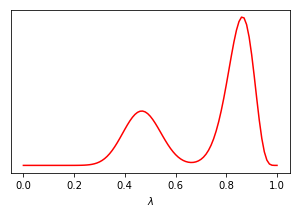

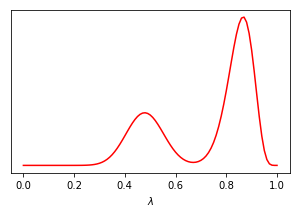

In [189]:
for x in xx:
    c[x] += 1
    N += 1
    plt.figure(figsize=(5,3))
    dist = log_beta_pdf(p, a+c[1], b+c[0])
    dist = dist/sum(dist)
    plt.plot(p, dist, 'r')
    #pi_ML =  (a+c[1])/(17+a+b+N)
    #pi_mode = (a+c[1]-1)/float(23+a+b+N-2)
    #tmp = str(int(a+c[1]-1))+'/'+str(23+a+b+N-2)
    #plt.xticks([0,pi_mode],('0',tmp))
    #plt.xticks([0,pi_mode])
    plt.yticks([])
    #plt.xlim([-0.1,1.1])
    #plt.ylim([0,6])
    #yl = plt.gca().get_ylim()
    #plt.plot([pi_ML, pi_ML], yl , 'k:')
    #plt.plot([pi_mode, pi_mode], yl , 'b:')
    
    plt.xlabel('$\lambda$')
    #plt.savefig('/Users/cemgil/Dropbox/tex/cam/talks/cmpe547/beta{n}.eps'.format(n=N), bbox_inches='tight')
    plt.show()


## Question from BOOKLET:
My observation:
0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1

We have two  $\pi$  values (parameters) which are $\pi_1$ and $\pi_2$

$\pi_1 \sim \beta (1,1)$

$\pi_2 \sim \beta (1,1)$

$X_i: $ 

$BE(x;\pi_1) \: i < m$

$BE(x;\pi_2) \: i \geq m$

$p(x_i|m,\pi_1,\pi_2) = BE(x;\pi)^{[i <m]}BE(x,\pi_2)^{[i\geq m]}   $

$=\pi_1^{x[i<m]}(1-\pi_1)^{(1-x)[1 <m]}  \pi_2^{x[i \geq m]}(1-\pi_2)^{(1-x)[1 \geq m]}$ 


In [193]:
obs = "00100100001000010010110011111111111011011111111111"
obs = [int(i) for i in obs]
a= 1
b=1

def berno(x1,x2, a, b):
    
    y = (x1**a)*(1-x1)**a

p = np.arange(0.0,1.01,0.01)

c = [0,0]
N = 0
plt.figure(figsize=(5,3))
dist = log_beta_pdf(p, a+c[1], b+c[0])
plt.plot(p, dist, 'r')
plt.xticks([0,1])
plt.yticks([])
#plt.xlim([-0.1,1.1])
#plt.ylim([0,6])
pi_ML =  (a+c[1])/(23+a+b+N)
yl = plt.gca().get_ylim()
plt.plot([pi_ML, pi_ML], yl , 'k:')

plt.xlabel('$\lambda$')
plt.show()


for x in xx:
    c[x] += 1
    N += 1
    plt.figure(figsize=(5,3))
    dist = log_beta_pdf(p, a+c[1], b+c[0])
    dist = dist/sum(dist)
    plt.plot(p, dist, 'r')
    #pi_ML =  (a+c[1])/(17+a+b+N)
    #pi_mode = (a+c[1]-1)/float(23+a+b+N-2)
    #tmp = str(int(a+c[1]-1))+'/'+str(23+a+b+N-2)
    #plt.xticks([0,pi_mode],('0',tmp))
    #plt.xticks([0,pi_mode])
    plt.yticks([])
    #plt.xlim([-0.1,1.1])
    #plt.ylim([0,6])
    #yl = plt.gca().get_ylim()
    #plt.plot([pi_ML, pi_ML], yl , 'k:')
    #plt.plot([pi_mode, pi_mode], yl , 'b:')
    
    plt.xlabel('$\lambda$')
    #plt.savefig('/Users/cemgil/Dropbox/tex/cam/talks/cmpe547/beta{n}.eps'.format(n=N), bbox_inches='tight')
    plt.show()
